In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
from datetime import datetime, timedelta, date
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error


In [3]:
df = pd.read_csv("traffic.csv", parse_dates=True, index_col='DateTime')
df.head()

,Junction,Vehicles,ID
DateTime,,,
2015-11-01 00:00:00,1,15,20151101001
2015-11-01 01:00:00,1,13,20151101011
2015-11-01 02:00:00,1,10,20151101021
2015-11-01 03:00:00,1,7,20151101031
2015-11-01 04:00:00,1,9,20151101041


In [4]:
df.describe()

,Junction,Vehicles,ID
count,48120.000000,48120.000000,4.812000e+04
mean,2.180549,22.791334,2.016330e+10
std,0.966955,20.750063,5.944854e+06
min,1.000000,1.000000,2.015110e+10
25%,1.000000,9.000000,2.016042e+10
50%,2.000000,15.000000,2.016093e+10
75%,3.000000,29.000000,2.017023e+10
max,4.000000,180.000000,2.017063e+10


In [5]:
# extract year from date
df['Year'] = pd.Series(df.index).apply(lambda x: x.year).to_list()

# extract month from date
df['Month'] = pd.Series(df.index).apply(lambda x: x.month).to_list()

# extract day from date
df['Day'] = pd.Series(df.index).apply(lambda x: x.day).to_list()

# extract hour from date
df['Hour'] = pd.Series(df.index).apply(lambda x: x.hour).to_list()

In [6]:
df.drop('ID', axis=1, inplace=True)

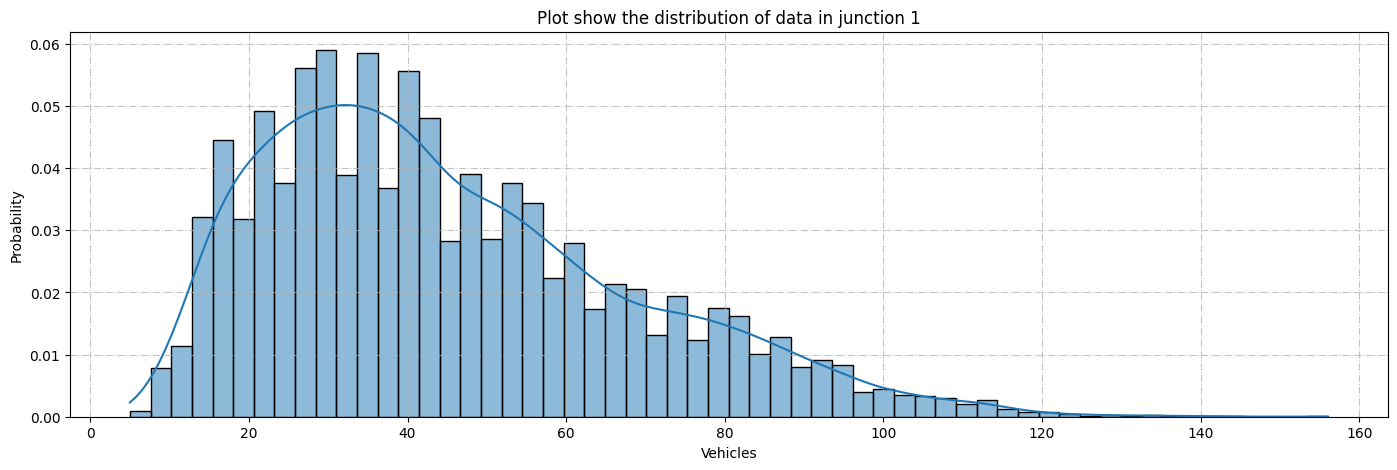

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

def make_hist(junction=1):
    data = df[df['Junction'] == junction]
    f, ax = plt.subplots(figsize=(17, 5))
    ax = sns.histplot(data['Vehicles'], kde=True, stat='probability')
    ax.set_title(f'Plot show the distribution of data in junction {junction}')
    ax.grid(True, ls='-.', alpha=0.75)
    plt.show()
    
    
make_hist(1)

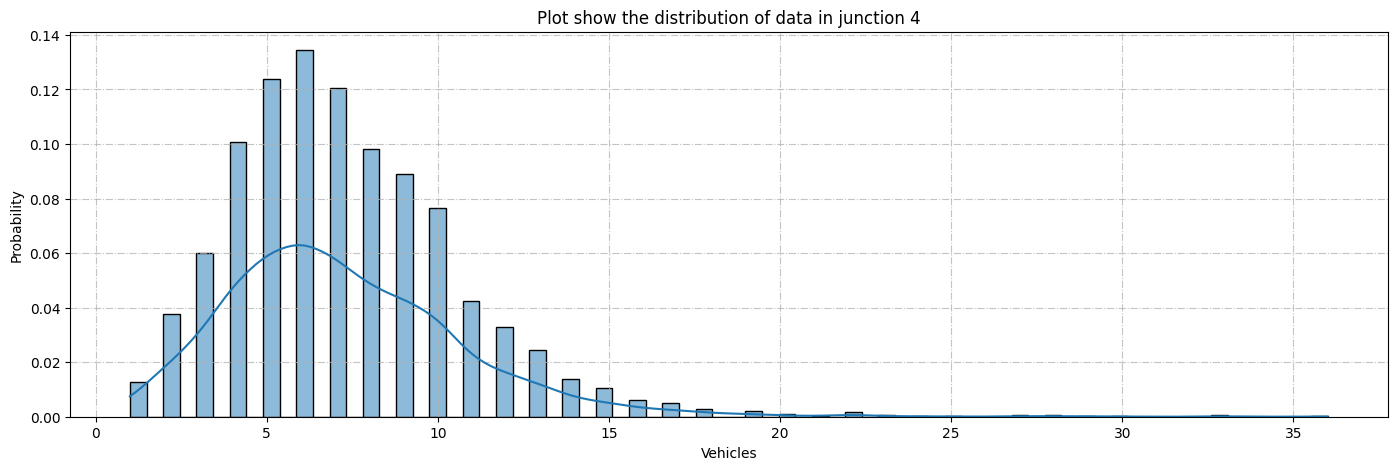

In [8]:
make_hist(4)

C:\Users\Praveen Reddy\AppData\Local\Temp\ipykernel_5308\2241322953.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.set_title(f'Plot show amounts of Vehicles in junction {junction} from {start.Month[0]}-{start.Year[0]} to {end.Month[0]}-{end.Year[0]}', fontsize=15)


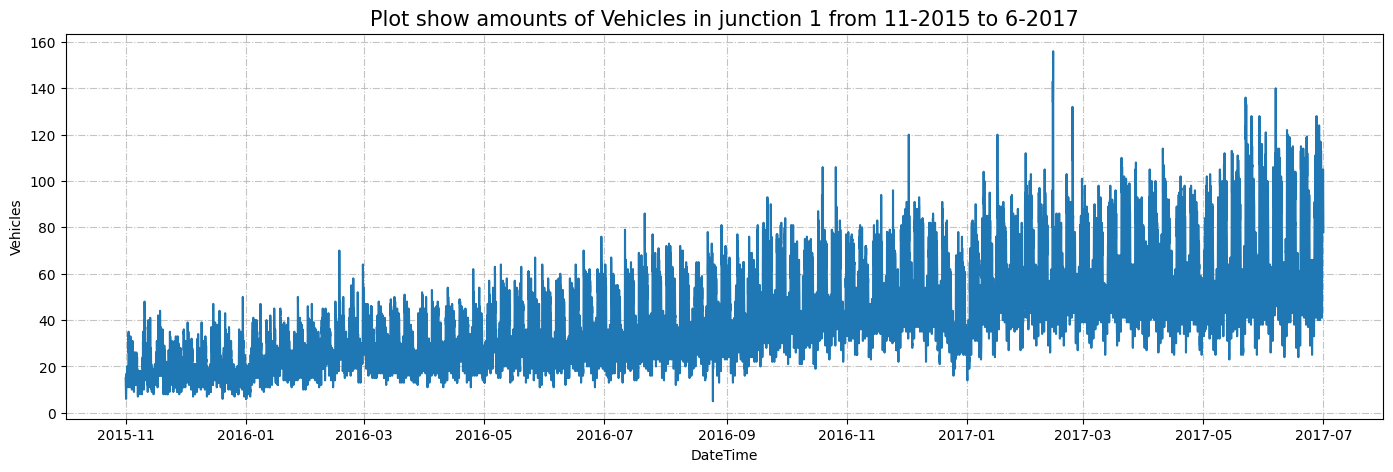

In [9]:
def make_time_series_plot(junction=1):
    f, ax = plt.subplots(figsize=(17, 5))
    data=df[df.Junction == junction]
    ax = sns.lineplot(data=data, y='Vehicles', x='DateTime', ax=ax)
    start = data.head(1)
    end = data.tail(1)
    ax.set_title(f'Plot show amounts of Vehicles in junction {junction} from {start.Month[0]}-{start.Year[0]} to {end.Month[0]}-{end.Year[0]}', fontsize=15)
    ax.grid(True, ls='-.', alpha=0.75)
    plt.show()
    
    
make_time_series_plot(1)

C:\Users\Praveen Reddy\AppData\Local\Temp\ipykernel_5308\2241322953.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.set_title(f'Plot show amounts of Vehicles in junction {junction} from {start.Month[0]}-{start.Year[0]} to {end.Month[0]}-{end.Year[0]}', fontsize=15)


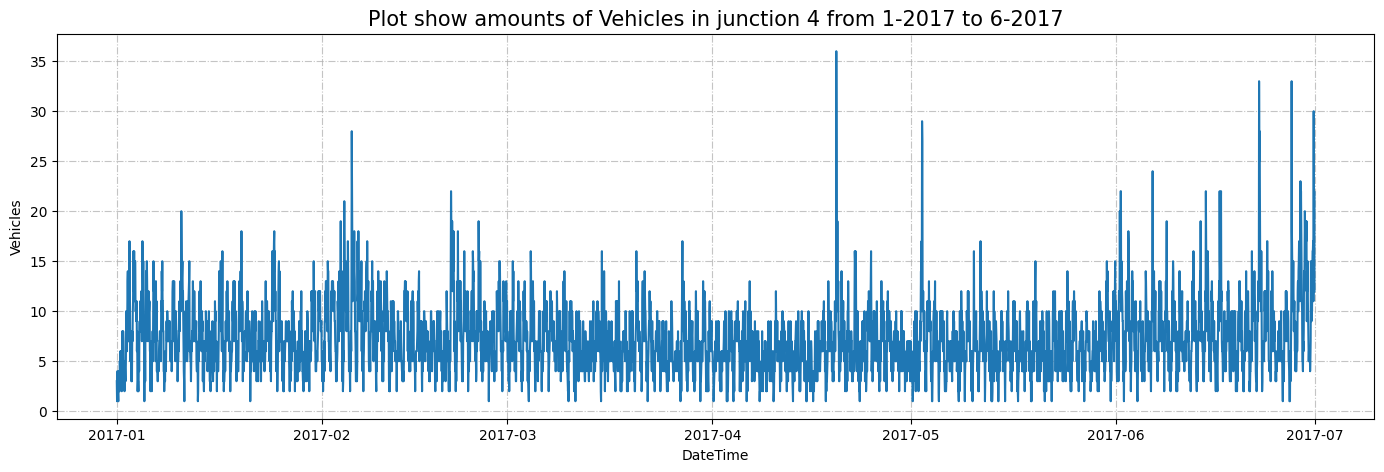

In [10]:
make_time_series_plot(4)

In [11]:
standardization = lambda x: StandardScaler().fit_transform(x)

In [12]:
z_df = df.copy()
z_df['Vehicles'] = standardization(z_df.Vehicles.values.reshape(-1, 1))
z_df.head()

,Junction,Vehicles,Year,Month,Day,Hour
DateTime,,,,,,
2015-11-01 00:00:00,1,-0.375489,2015,11,1,0
2015-11-01 01:00:00,1,-0.471875,2015,11,1,1
2015-11-01 02:00:00,1,-0.616454,2015,11,1,2
2015-11-01 03:00:00,1,-0.761034,2015,11,1,3
2015-11-01 04:00:00,1,-0.664648,2015,11,1,4


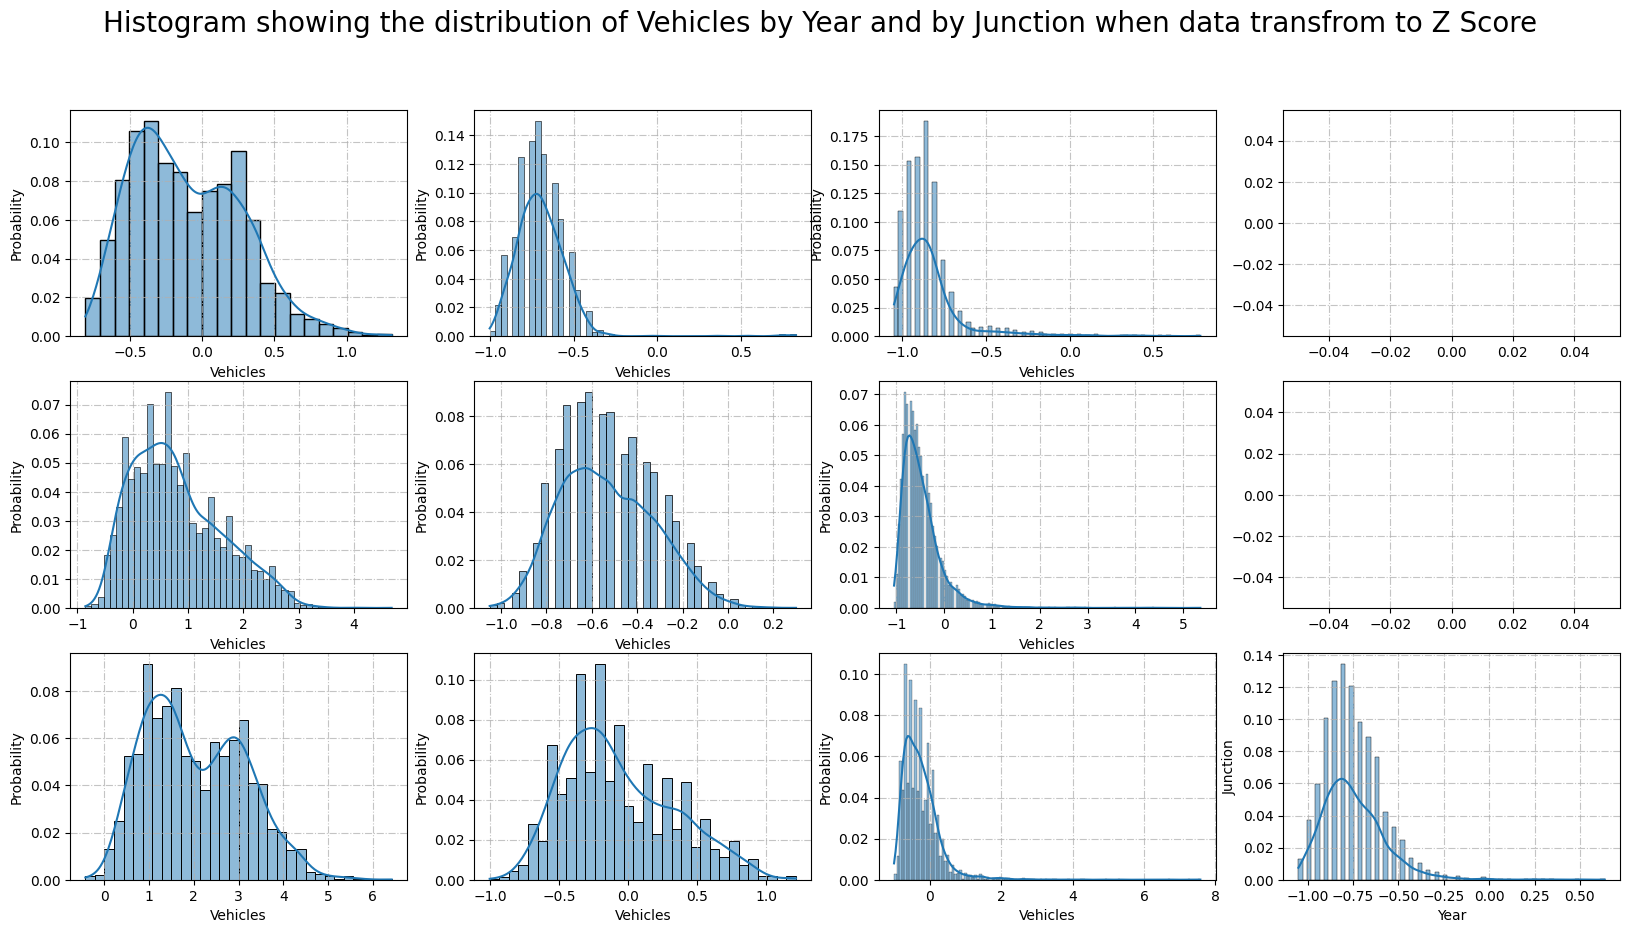

In [13]:
f, axis = plt.subplots(3, 4, figsize=(20, 10))

for i, year in enumerate(range(2015, 2018)):
  for j, junction in enumerate(range(1, 5)):
    sns.histplot(z_df[(z_df.Junction == junction) & (z_df.Year == year)]['Vehicles'], kde=True, ax=axis[i, j], stat='probability')
    axis[i, j].grid(True, alpha=0.75, ls='-.')
    
plt.xlabel('Year')
plt.ylabel('Junction')
f.suptitle('Histogram showing the distribution of Vehicles by Year and by Junction when data transfrom to Z Score', fontsize=20)
plt.show()

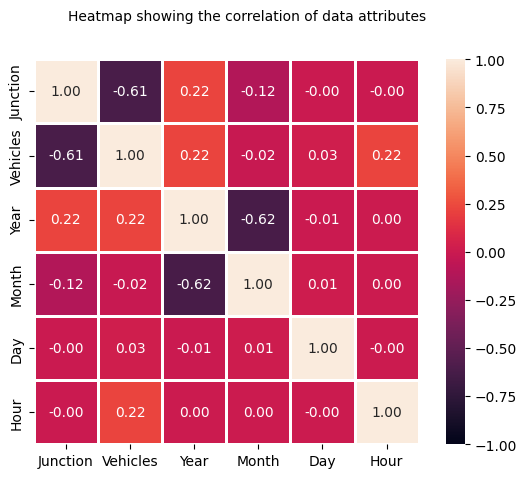

In [14]:
corr = df.corr()
f, ax = plt.subplots(figsize=(7, 5))
sns.heatmap(corr, annot=True, fmt='.2f', vmin=-1, vmax=1, square=True, linewidths=1)
f.suptitle('Heatmap showing the correlation of data attributes', fontsize=10)
plt.show()

In [15]:
def get_list_data(dataf, drop=[]):
  for i in drop:
    try:
      dataf.drop(drop, axis=1, inplace=True)
    except:
      print(f"{i} doesn't has in data")
  # create a list of dataframe has the data in that junction and remove the junction identify
  dataf = [dataf[dataf.Junction == i].drop('Junction', axis=1) for i in range(5)]
  return dataf

data = get_list_data(df)
for i in data:
    print(i.head(1))

Empty DataFrame
Columns: [Vehicles, Year, Month, Day, Hour]
Index: []
            Vehicles  Year  Month  Day  Hour
DateTime                                    
2015-11-01        15  2015     11    1     0
            Vehicles  Year  Month  Day  Hour
DateTime                                    
2015-11-01         6  2015     11    1     0
            Vehicles  Year  Month  Day  Hour
DateTime                                    
2015-11-01         9  2015     11    1     0
            Vehicles  Year  Month  Day  Hour
DateTime                                    
2017-01-01         3  2017      1    1     0


In [16]:
def make_metrics(models):
    data = {
        'name': [model.name for model in models[1:]],
        'r2': [model.r2 for model in models[1:]],
        'rmse': [model.rmse for model in models[1:]]
    }
    data['name'] = 'average R2 and sum RMSE'
    data['r2'].append(np.mean(data['r2']))
    data['rmse'].append(np.sum(data['rmse']))
    return pd.DataFrame(data)

In [20]:
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

class Model:
    def __init__(self, name, data, predict_features, test_size, ml_model):
        self.name = name
        self.data = data
        self.predict_features = predict_features
        self.is_trained = False
        self.test_size = test_size
        self.ml_model = ml_model
        self.do_things()

    def cal_rmse(self):
        self.rmse = mean_squared_error(self.ytest, self.ypredict, squared=False)
        return self.rmse

    def prequisite(self, test_size):
        self.features = [i for i in self.data.columns if i != self.predict_features]
        self.X = self.data[self.features].values
        self.y = self.data[self.predict_features].values
        self.Xtrain, self.Xtest, self.ytrain, self.ytest = train_test_split(self.X, self.y, test_size=test_size)
        return None

    def fit(self):
        self.is_trained = True
        self.ml_model.fit(self.Xtrain, self.ytrain)
        self.ypredict = self.ml_model.predict(self.Xtest)
        return self.ml_model

    def cal_r2_score(self):
        self.r2 = r2_score(self.ytest, self.ypredict)
        return self.r2

    def do_things(self) -> None:
        self.prequisite(self.test_size)
        self.fit()
        self.cal_rmse()
        self.cal_r2_score()
        return None

    def feature_importances(self, ax):
        feature_importances = self.ml_model.feature_importances_
        index = self.features
        data = pd.DataFrame(pd.Series(feature_importances, index=index).nlargest(10)).reset_index()
        data.columns = ['Features', 'Value']
        g = sns.barplot(data=data, x='Features', y='Value', ax=ax)
        for p in g.patches:
            ax.annotate(
                format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2, p.get_height() + 0.02),
                ha='center', va='center', weight='bold', fontsize=9
            )
        ax.set_title(f'Plot of {self.name}', fontsize=12)
        ax.grid(True, ls='-.', alpha=0.7)
        ax.set_ylim(0, 1)

    def __repr__(self) -> str:
        if not self.is_trained:
            return f'<{self.name}> (is not trained yet)>'
        return f'<({self.name}: [R² Score: {self.r2}], [RMSE: {self.rmse}])>'


In [21]:
models = [None]
for i in range(1, 5):
    models += [
        Model(
            ml_model=RandomForestRegressor(),
            name=f'Dataset of junction {i}',
            data=data[i],
            predict_features='Vehicles',
            test_size=1/4
        )
    ]
    
make_metrics(models)

,name,r2,rmse
0,average R2 and sum RMSE,0.943072,5.469980
1,average R2 and sum RMSE,0.856648,2.809940
2,average R2 and sum RMSE,0.718069,5.350535
3,average R2 and sum RMSE,0.452626,2.727660
4,average R2 and sum RMSE,0.742604,16.358115


In [22]:
z_data = get_list_data(z_df)
for i in z_data:
    print(i.head(1))

z_models = [None]
for i in range(1, 5):
    z_models += [
        Model(
            ml_model=RandomForestRegressor(),
            name=f'Dataset of junction {i}',
            data=z_data[i],
            predict_features='Vehicles',
            test_size=1/4
        )
    ]

make_metrics(z_models)

Empty DataFrame
Columns: [Vehicles, Year, Month, Day, Hour]
Index: []
            Vehicles  Year  Month  Day  Hour
DateTime                                    
2015-11-01 -0.375489  2015     11    1     0
            Vehicles  Year  Month  Day  Hour
DateTime                                    
2015-11-01 -0.809227  2015     11    1     0
            Vehicles  Year  Month  Day  Hour
DateTime                                    
2015-11-01 -0.664648  2015     11    1     0
            Vehicles  Year  Month  Day  Hour
DateTime                                    
2017-01-01 -0.953806  2017      1    1     0


,name,r2,rmse
0,average R2 and sum RMSE,0.942775,0.266394
1,average R2 and sum RMSE,0.860100,0.135701
2,average R2 and sum RMSE,0.714090,0.280408
3,average R2 and sum RMSE,0.529191,0.115767
4,average R2 and sum RMSE,0.761539,0.798271


In [23]:
lag_df = df.copy()
for i in range(1, 3):
    lag_df[f'Vehicles_lag_{i}'] = df.Vehicles.shift(i)

# drop all rows with nan, because lag data cause nan
lag_df.dropna(inplace=True)
lag_df.head()

,Junction,Vehicles,Year,Month,Day,Hour,Vehicles_lag_1,Vehicles_lag_2
DateTime,,,,,,,,
2015-11-01 02:00:00,1,10,2015,11,1,2,13.0,15.0
2015-11-01 03:00:00,1,7,2015,11,1,3,10.0,13.0
2015-11-01 04:00:00,1,9,2015,11,1,4,7.0,10.0
2015-11-01 05:00:00,1,6,2015,11,1,5,9.0,7.0
2015-11-01 06:00:00,1,9,2015,11,1,6,6.0,9.0


In [24]:
lag_data = get_list_data(lag_df, drop=['Year'])
for i in lag_data:
    print(i.head(1))

Empty DataFrame
Columns: [Vehicles, Month, Day, Hour, Vehicles_lag_1, Vehicles_lag_2]
Index: []
                     Vehicles  Month  Day  Hour  Vehicles_lag_1  \
DateTime                                                          
2015-11-01 02:00:00        10     11    1     2            13.0   

                     Vehicles_lag_2  
DateTime                             
2015-11-01 02:00:00            15.0  
            Vehicles  Month  Day  Hour  Vehicles_lag_1  Vehicles_lag_2
DateTime                                                              
2015-11-01         6     11    1     0            78.0            84.0
            Vehicles  Month  Day  Hour  Vehicles_lag_1  Vehicles_lag_2
DateTime                                                              
2015-11-01         9     11    1     0            27.0            29.0
            Vehicles  Month  Day  Hour  Vehicles_lag_1  Vehicles_lag_2
DateTime                                                              
2017-01-01         3

In [25]:
lag_models = [None]
for i in range(1, 5):
    lag_models += [
        Model(
            ml_model=RandomForestRegressor(),
            name=f'Dataset of junction {i} with lag data',
            data=lag_data[i],
            predict_features='Vehicles',
            test_size=1/3
        )
    ]

make_metrics(lag_models)

,name,r2,rmse
0,average R2 and sum RMSE,0.967272,4.167815
1,average R2 and sum RMSE,0.883691,2.496805
2,average R2 and sum RMSE,0.728352,5.531672
3,average R2 and sum RMSE,0.526690,2.454574
4,average R2 and sum RMSE,0.776501,14.650866


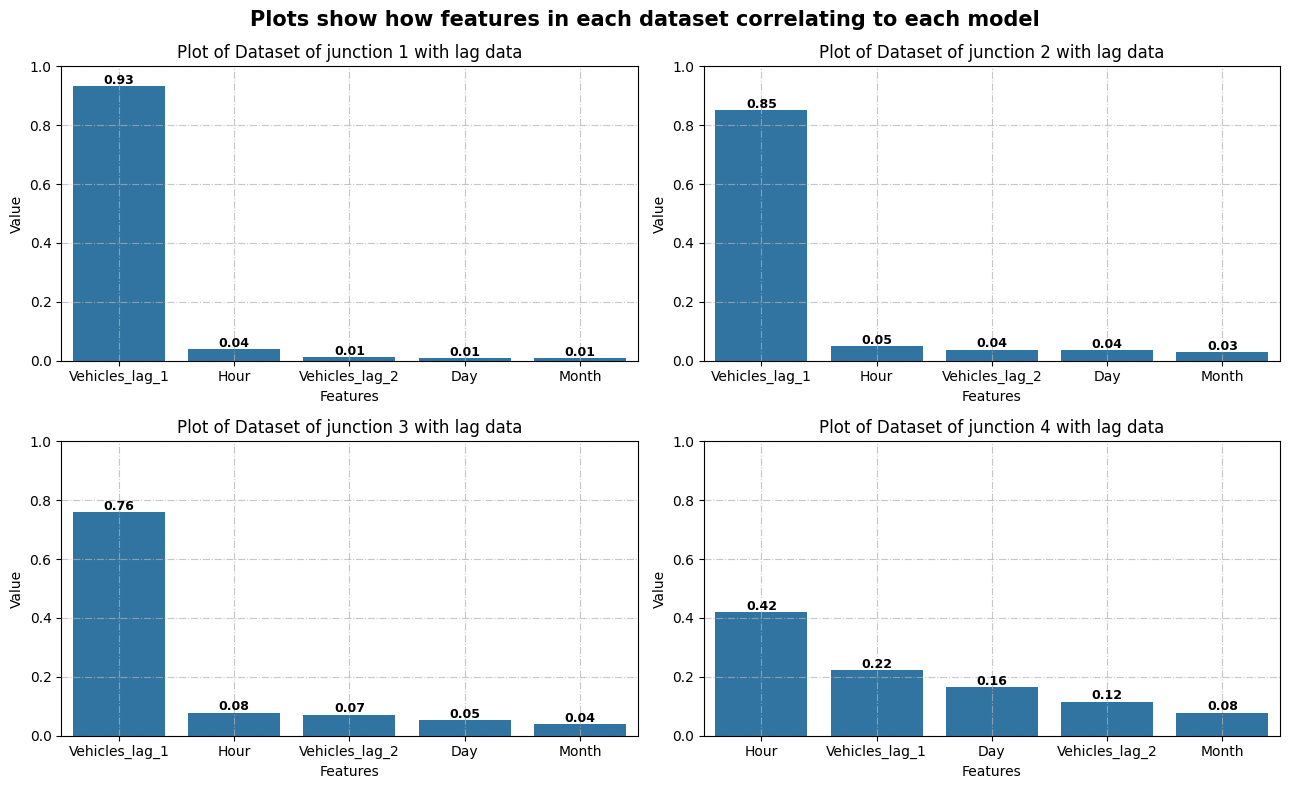

In [26]:
f, ax = plt.subplots(nrows=2, ncols=2, figsize=(13, 8))
k = 1
for i in range(2):
    for j in range(2):
        lag_models[k].feature_importances(ax[i, j])
        k += 1
f.suptitle('Plots show how features in each dataset correlating to each model', fontsize=15, fontweight='bold')        
f.tight_layout()